Text(0, 0.5, '')

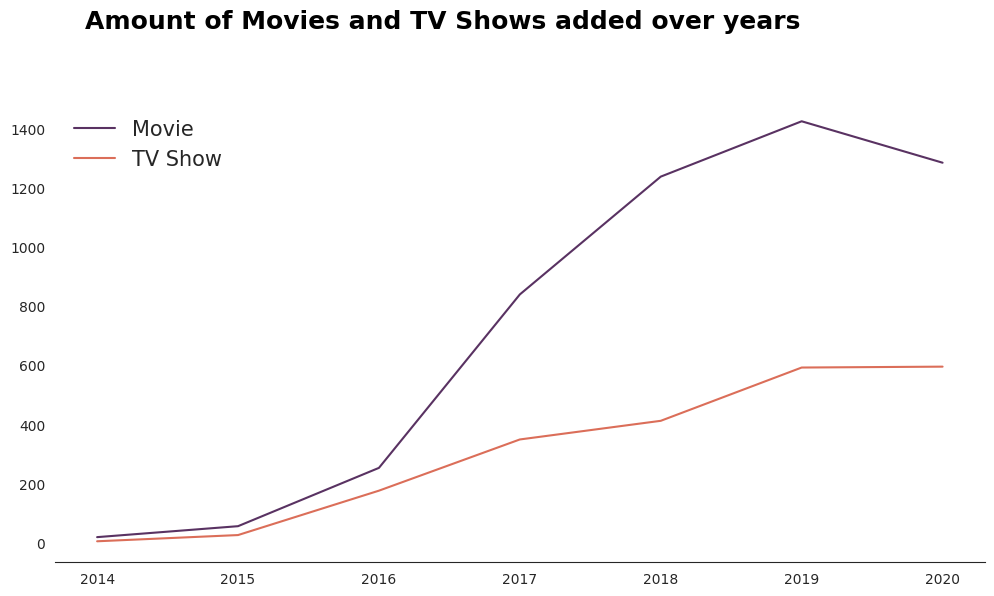

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import warnings

warnings.filterwarnings("ignore")
sns.set_style("white")
df = pd.read_csv("netflix.csv")

df["date_added"] = pd.to_datetime(df["date_added"])
df["year_added"] = df["date_added"].dt.year
index = [2014, 2015, 2016, 2017, 2018, 2019, 2020]

ts_df = df[df["year_added"] > 2013]
ts_df = (
    ts_df[ts_df["year_added"] < 2021]
    .groupby("type")["year_added"]
    .value_counts()
    .unstack()
    .T
)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.text(
    0.15,
    1,
    "Amount of Movies and TV Shows added over years",
    fontsize=18,
    fontweight="bold",
    color="black",
)

g1 = sns.lineplot(x=ts_df.index, y=ts_df["Movie"], color="#593262", label="Movie")
g2 = sns.lineplot(x=ts_df.index, y=ts_df["TV Show"], color="#db6e59", label="TV Show")


for i in ["top", "left", "right"]:
    ax.spines[i].set_visible(False)

ax.legend(loc="upper left", frameon=False, prop={"size": 15})
plt.xlabel("")
plt.ylabel("")

In [2]:
import pandas as pd
# Load your data
df = pd.read_csv('netflix.csv')
# Drop missing values
df.dropna(subset=['director', 'cast'], inplace=True)

df.reset_index(drop=True, inplace=True)



# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year and month from date_added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Fill missing values for year_added and month_added
df['year_added'].fillna(df['year_added'].mode()[0], inplace=True)
df['month_added'].fillna(df['month_added'].mode()[0], inplace=True)

# Drop the original date_added column
df.drop('date_added', axis=1, inplace=True)

# Convert the multi-valued features to lists
multi_valued_features = ['cast', 'country', 'listed_in', 'director']
for feature in multi_valued_features:
    df[feature] = df[feature].apply(lambda x: str(x).split(","))

# Filter out movies from the dataset
df_movies = df[df['type'] == 'Movie']

# Count the number of films each director has on Netflix
dict_director = {}

for pp in df_movies['director']:
  for ppp in pp:
    dict_director[ppp] = 0

sum_movie = 0
for pp in df_movies['director']:
  for ppp in pp:
    dict_director[ppp] += 1
    sum_movie += 1




# Calculate the average number of films per director
average_films = sum_movie / len(dict_director)
print(f"Average number of films per director: {average_films}")


Average number of films per director: 1.3741877660766302


Text(0, 0.5, '')

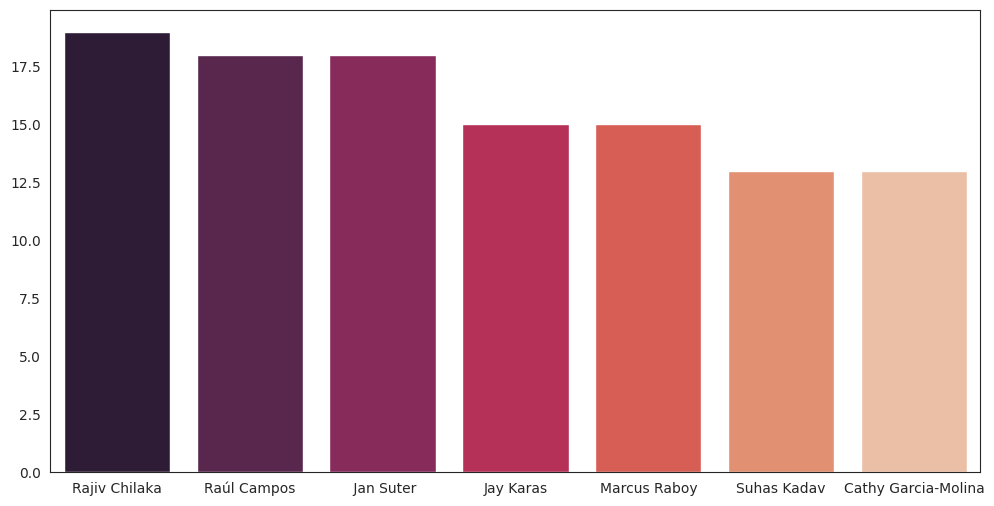

In [3]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import warnings

top7_director = dict(Counter(dict_director).most_common(7))

my_df = pd.DataFrame(top7_director.items())

plt.figure(figsize=(12,6))
ax = sns.barplot(data=my_df, x= 0, y= 1,palette="rocket")
ax.set(ylabel = 0)

plt.xlabel("")
plt.ylabel("")


In [4]:
dataset = []
dataset = df['director'] + df['cast'] + df['listed_in']

type(dataset)
dataset = list(dataset)


In [5]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
dff = pd.DataFrame(te_ary, columns=te.columns_)
dff

,Jr.,"""Riley"" Lakdhar Dridi",'Najite Dede,2Mex,50 Cent,9m88,A. Murat Özgen,A.C. Peterson,A.J. Cook,A.J. Johnson,...,Çağlar Çorumlu,Çetin Tekindor,Ísold Uggadóttir,Óskar Thór Axelsson,Ömer Faruk Sorak,Úrsula Corberó,İbrahim Büyükak,Şahin Irmak,Şenol Sönmez,Ṣọpẹ́ Dìrísù
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5696,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5697,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5698,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:


frequent_itemsets = apriori(dff, min_support=0.003, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

frequent_itemsets

,support,itemsets,length
0,0.008596,( Anime Features),1
1,0.006667,( Anupam Kher),1
2,0.004386,( Boman Irani),1
3,0.006140,( Children & Family Movies),1
4,0.006316,( Classic Movies),1
...,...,...,...
193,0.003333,"(Rajiv Chilaka, Children & Family Movies, Raj...",4
194,0.003158,"(Rajiv Chilaka, Rupa Bhimani, Children & Fami...",4
195,0.003158,"(Rajiv Chilaka, Rupa Bhimani, Children & Fami...",4
196,0.003158,"( Jigna Bhardwaj, Rajiv Chilaka, Children & Fa...",5


In [7]:
frequent_itemsets['count'] = frequent_itemsets['support'].apply(lambda x: x * 5700)

frequent_itemsets

,support,itemsets,length,count
0,0.008596,( Anime Features),1,49.0
1,0.006667,( Anupam Kher),1,38.0
2,0.004386,( Boman Irani),1,25.0
3,0.006140,( Children & Family Movies),1,35.0
4,0.006316,( Classic Movies),1,36.0
...,...,...,...,...
193,0.003333,"(Rajiv Chilaka, Children & Family Movies, Raj...",4,19.0
194,0.003158,"(Rajiv Chilaka, Rupa Bhimani, Children & Fami...",4,18.0
195,0.003158,"(Rajiv Chilaka, Rupa Bhimani, Children & Fami...",4,18.0
196,0.003158,"( Jigna Bhardwaj, Rajiv Chilaka, Children & Fa...",5,18.0


In [8]:
a = frequent_itemsets[ (frequent_itemsets['length'] > 3) &
                   (frequent_itemsets['count'] >= 15) ]

a

,support,itemsets,length,count
187,0.003158,"(Children & Family Movies, Rajesh Kava, Juli...",4,18.0
188,0.003158,"(Rajiv Chilaka, Rajesh Kava, Julie Tejwani, ...",4,18.0
189,0.003158,"(Rajiv Chilaka, Children & Family Movies, Jul...",4,18.0
190,0.003158,"(Rajiv Chilaka, Children & Family Movies, Raj...",4,18.0
191,0.003333,"( Rupa Bhimani, Children & Family Movies, Raj...",4,19.0
192,0.003158,"(Rajiv Chilaka, Rupa Bhimani, Rajesh Kava, ...",4,18.0
193,0.003333,"(Rajiv Chilaka, Children & Family Movies, Raj...",4,19.0
194,0.003158,"(Rajiv Chilaka, Rupa Bhimani, Children & Fami...",4,18.0
195,0.003158,"(Rajiv Chilaka, Rupa Bhimani, Children & Fami...",4,18.0
196,0.003158,"( Jigna Bhardwaj, Rajiv Chilaka, Children & Fa...",5,18.0


In [9]:
for x in a['itemsets']:
  print(x)

frozenset({'Children & Family Movies', ' Rajesh Kava', ' Julie Tejwani', ' Jigna Bhardwaj'})
frozenset({'Rajiv Chilaka', ' Rajesh Kava', ' Julie Tejwani', ' Jigna Bhardwaj'})
frozenset({'Rajiv Chilaka', 'Children & Family Movies', ' Julie Tejwani', ' Jigna Bhardwaj'})
frozenset({'Rajiv Chilaka', 'Children & Family Movies', ' Rajesh Kava', ' Jigna Bhardwaj'})
frozenset({' Rupa Bhimani', 'Children & Family Movies', ' Rajesh Kava', ' Julie Tejwani'})
frozenset({'Rajiv Chilaka', ' Rupa Bhimani', ' Rajesh Kava', ' Julie Tejwani'})
frozenset({'Rajiv Chilaka', 'Children & Family Movies', ' Rajesh Kava', ' Julie Tejwani'})
frozenset({'Rajiv Chilaka', ' Rupa Bhimani', 'Children & Family Movies', ' Julie Tejwani'})
frozenset({'Rajiv Chilaka', ' Rupa Bhimani', 'Children & Family Movies', ' Rajesh Kava'})
frozenset({' Jigna Bhardwaj', 'Rajiv Chilaka', 'Children & Family Movies', ' Rajesh Kava', ' Julie Tejwani'})
frozenset({' Rupa Bhimani', 'Rajiv Chilaka', 'Children & Family Movies', ' Rajesh Kav

In [10]:
df_ar = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 1)
df_ar.head(12)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,( Anime Features),(Action & Adventure),0.008596,0.148772,0.008596,1.0,6.721698,0.007318,inf
1,( Yashpal Sharma),( International Movies),0.003158,0.425614,0.003158,1.0,2.349547,0.001814,inf
2,( Jan Suter),(Raúl Campos),0.003158,0.003158,0.003158,1.0,316.666667,0.003148,inf
3,(Raúl Campos),( Jan Suter),0.003158,0.003158,0.003158,1.0,316.666667,0.003148,inf
4,( Jan Suter),(Stand-Up Comedy),0.003158,0.054211,0.003158,1.0,18.446602,0.002987,inf
5,( Jigna Bhardwaj),(Children & Family Movies),0.003333,0.096140,0.003333,1.0,10.401460,0.003013,inf
6,( Julie Tejwani),(Children & Family Movies),0.004211,0.096140,0.004211,1.0,10.401460,0.003806,inf
7,(Rajiv Chilaka),( Julie Tejwani),0.003333,0.004211,0.003333,1.0,237.500000,0.003319,inf
8,( Rajesh Kava),(Children & Family Movies),0.003684,0.096140,0.003684,1.0,10.401460,0.003330,inf
9,(Rajiv Chilaka),( Rajesh Kava),0.003333,0.003684,0.003333,1.0,271.428571,0.003321,inf


In [11]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

%matplotlib inline
pd.set_option('display.max_colwidth', 300)

In [12]:
# Load your data
df = pd.read_csv('netflix.csv')
# Drop missing values
df.dropna(subset=['director', 'cast'], inplace=True)

df.reset_index(drop=True, inplace=True)



# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year and month from date_added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Fill missing values for year_added and month_added
df['year_added'].fillna(df['year_added'].mode()[0], inplace=True)
df['month_added'].fillna(df['month_added'].mode()[0], inplace=True)

# Drop the original date_added column
df.drop('date_added', axis=1, inplace=True)

# Convert the multi-valued features to lists
multi_valued_features = ['cast', 'country', 'listed_in', 'director']
for feature in multi_valued_features:
    df[feature] = df[feature].apply(lambda x: str(x).split(","))

In [13]:
all_genres = sum(df['listed_in'],[])
len(set(all_genres))

70

In [14]:
all_genres = nltk.FreqDist(all_genres)

# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()),
                              'Count': list(all_genres.values())})

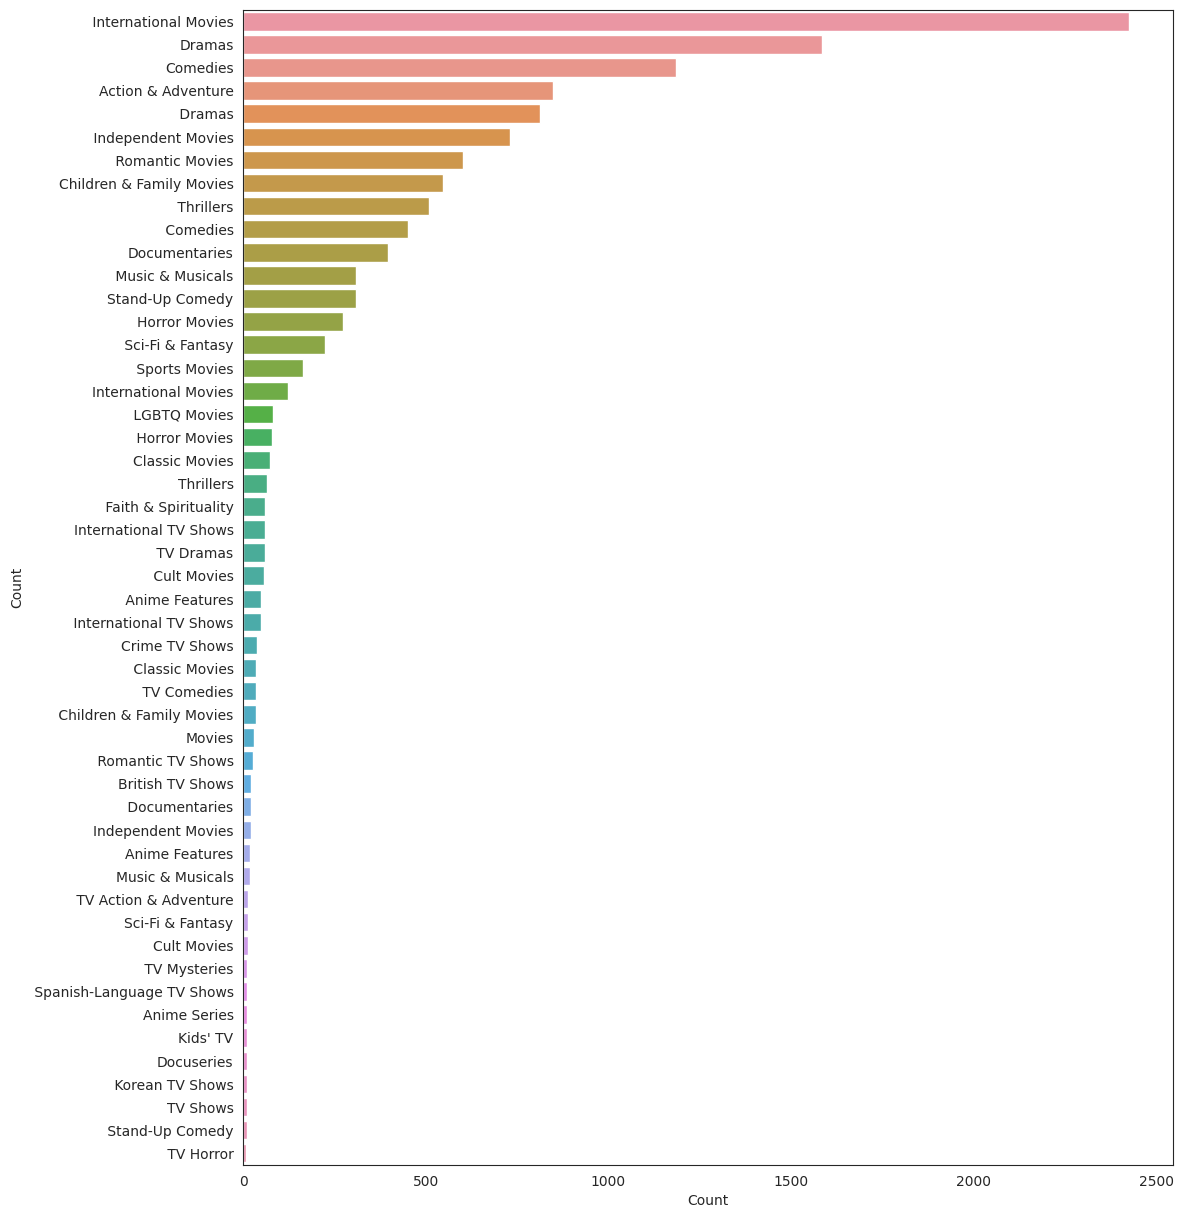

In [15]:
g = all_genres_df.nlargest(columns="Count", n = 50)
plt.figure(figsize=(12,15))
ax = sns.barplot(data=g, x= "Count", y = "Genre")
ax.set(ylabel = 'Count')
plt.show()

In [16]:
def clean_text(text):
    # remove backslash-apostrophe
    text = re.sub("\'", "", text)
    # remove everything except alphabets
    text = re.sub("[^a-zA-Z]"," ",text)
    # remove whitespaces
    text = ' '.join(text.split())
    # convert text to lowercase
    text = text.lower()

    return text

In [17]:
df['clean_description'] = df['description'].apply(lambda x: clean_text(x))

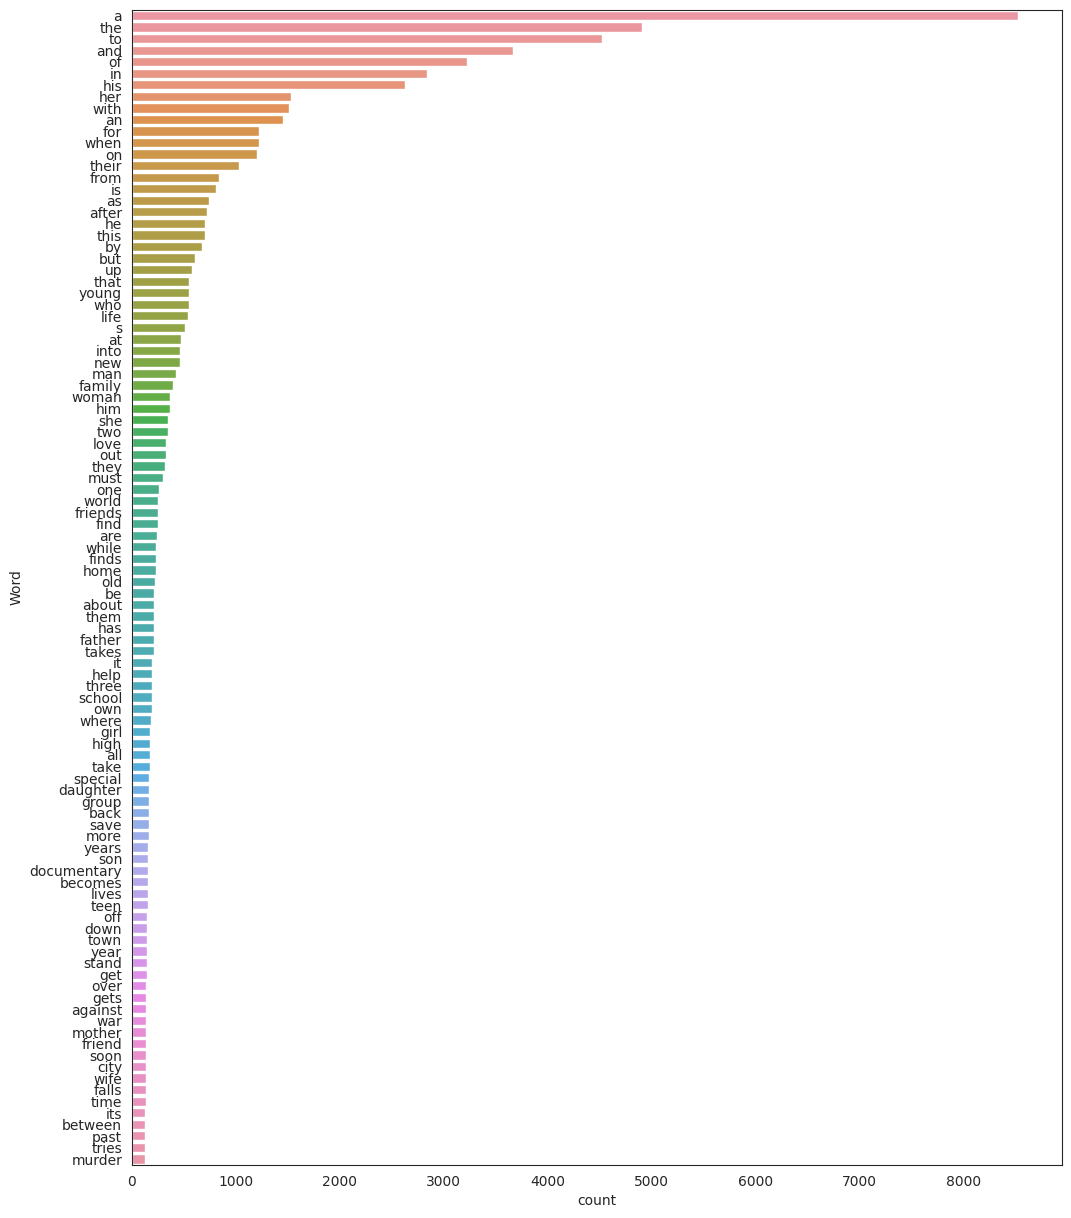

In [18]:
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  fdist = nltk.FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)

  # visualize words and frequencies
  plt.figure(figsize=(12,15))
  ax = sns.barplot(data=d, x= "count", y = "word")
  ax.set(ylabel = 'Word')
  plt.show()

# print 100 most frequent words
freq_words(df['clean_description'], 100)

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

df['clean_description'] = df['clean_description'].apply(lambda x: remove_stopwords(x))

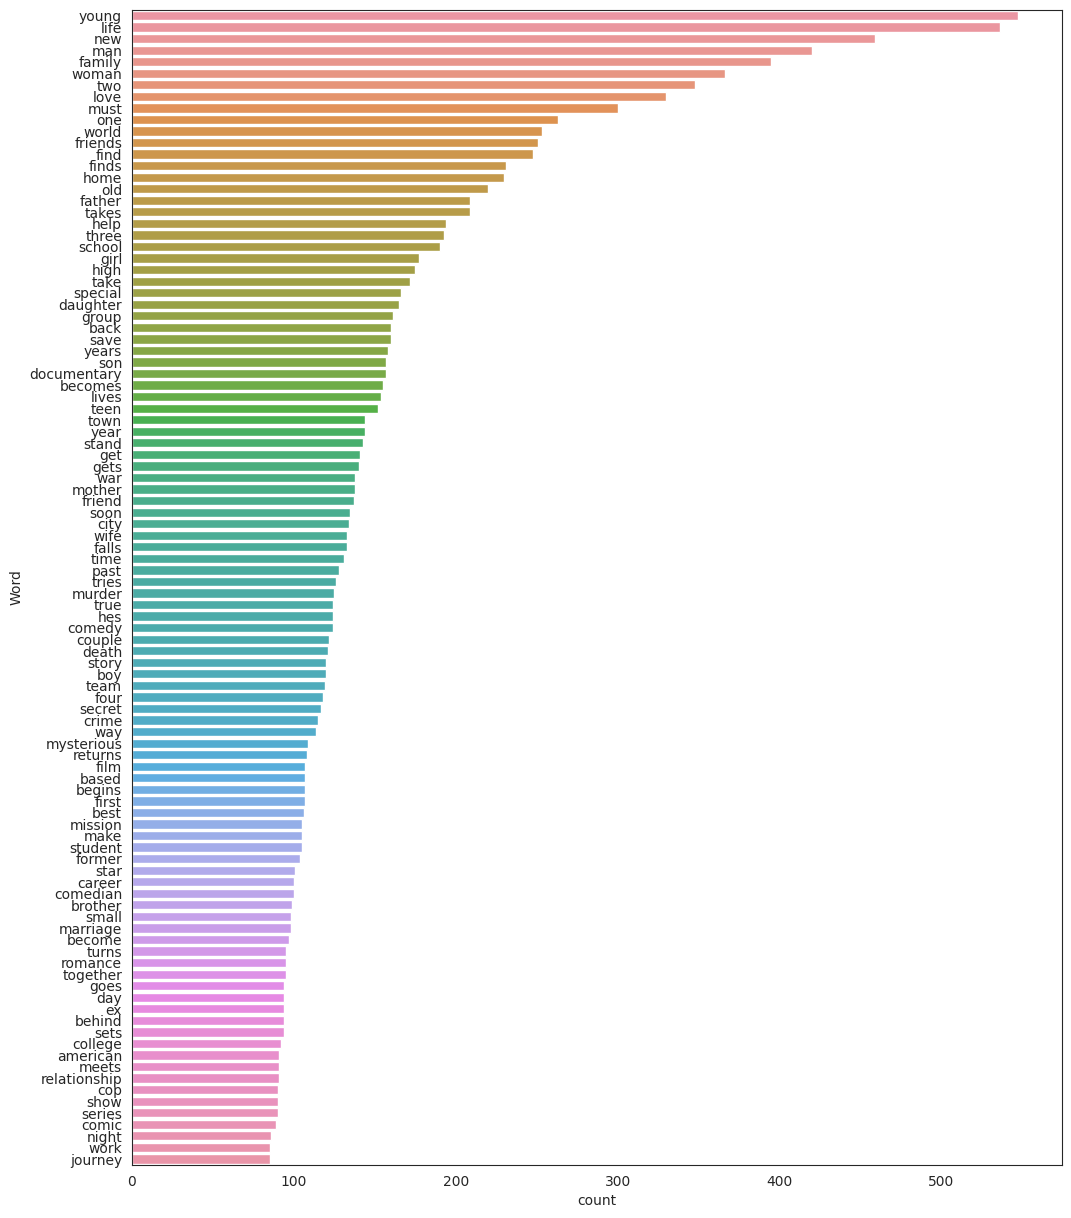

In [21]:
freq_words(df['clean_description'], 100)

In [22]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df['listed_in'])

# transform target variable
y = multilabel_binarizer.transform(df['listed_in'])

In [23]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [24]:
xtrain, xval, ytrain, yval = train_test_split(df['clean_description'], y, test_size=0.2, random_state=9)

In [25]:
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [26]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

In [27]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

# fit model on train data
clf.fit(xtrain_tfidf, ytrain)

# make predictions for validation set
y_pred = clf.predict(xval_tfidf)


In [28]:
print(y_pred[549])
print(multilabel_binarizer.inverse_transform(y_pred)[549])

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(' International Movies', ' Romantic Movies', 'Dramas')


In [29]:
# evaluate performance
f1_score(yval, y_pred, average="micro")

0.23185483870967744

In [30]:
# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)

In [31]:
t = 0.2 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)

In [32]:
# evaluate performance
f1_score(yval, y_pred_new, average="micro")

0.4808349829044448

In [33]:
from sklearn.metrics import classification_report
print(classification_report(yval, y_pred_new))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00        12
           4       0.62      0.08      0.14        99
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         2
           9       0.31      0.24      0.27       162
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00        16
          12       0.26      0.16      0.20       145
          13       0.44      0.99      0.61       481
          14       0.00      0.00      0.00        13
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         3
          17       0.00    